In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter

In [2]:
# Definir las rutas de los directorios de las imágenes
train_dir = 'data/train'
test_dir = 'data/test'
valid_dir = 'data/valid'

# Crear un DataFrame vacío para almacenar la información de las imágenes
image_data = pd.DataFrame(columns=['filepath', 'category', 'width', 'height'])

# Función para obtener información de las imágenes
def load_image_data(directory, category_name):
    data = []
    category_path = os.path.join(directory, category_name)
    for file in os.listdir(category_path):
        filepath = os.path.join(category_path, file)
        if file.endswith(('.jpg', '.jpeg', '.png')):
            with Image.open(filepath) as img:
                width, height = img.size
            data.append([filepath, category_name, width, height])
    return pd.DataFrame(data, columns=['filepath', 'category', 'width', 'height'])

# Cargar datos de las imágenes de cada categoría (Melanoma, NotMelanoma)
for category in ['Melanoma', 'NotMelanoma']:
    image_data = pd.concat([image_data, load_image_data(train_dir, category)])
    image_data = pd.concat([image_data, load_image_data(test_dir, category)])
    image_data = pd.concat([image_data, load_image_data(valid_dir, category)])

# Resetear el índice del DataFrame
image_data.reset_index(drop=True, inplace=True)


In [3]:
# Mostrar las primeras filas del DataFrame
print(image_data.head())

                                filepath  category width height
0  data/train/Melanoma/melanoma_7039.jpg  Melanoma   224    224
1   data/train/Melanoma/ISIC_0010550.jpg  Melanoma   224    224
2  data/train/Melanoma/melanoma_9014.jpg  Melanoma   224    224
3  data/train/Melanoma/melanoma_6327.jpg  Melanoma   224    224
4   data/train/Melanoma/ISIC_0035920.jpg  Melanoma   224    224


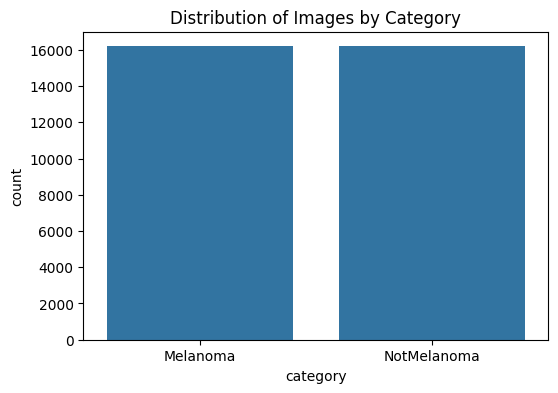

In [4]:
# Distribución de clases
plt.figure(figsize=(6, 4))
sns.countplot(x='category', data=image_data)
plt.title('Distribution of Images by Category')
plt.show()

In [5]:
# Estadísticas descriptivas del tamaño de las imágenes
print("\nImage size statistics:")
print(image_data[['width', 'height']].describe())


Image size statistics:
        width  height
count   32386   32386
unique      1       1
top       224     224
freq    32386   32386


<Figure size 600x600 with 0 Axes>

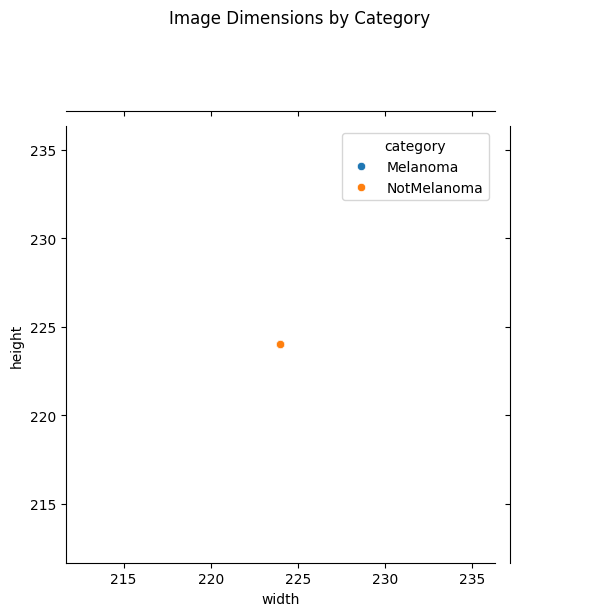

In [6]:
# Visualizar las dimensiones de las imágenes
plt.figure(figsize=(6, 6))
sns.jointplot(x='width', y='height', data=image_data, hue='category')
plt.suptitle('Image Dimensions by Category', y=1.02)
plt.show()

In [7]:
# Mostrar algunas imágenes de ejemplo
def show_images(category, num_images=5):
    sample_images = image_data[image_data['category'] == category].sample(num_images)
    plt.figure(figsize=(12, 8))
    for i, row in enumerate(sample_images.iterrows()):
        filepath = row[1]['filepath']
        img = Image.open(filepath)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f"{category} {i+1}")
        plt.axis('off')
    plt.show()


Example images - Melanoma


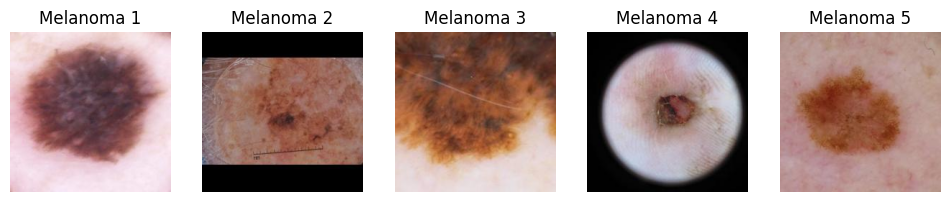


Example images - NotMelanoma


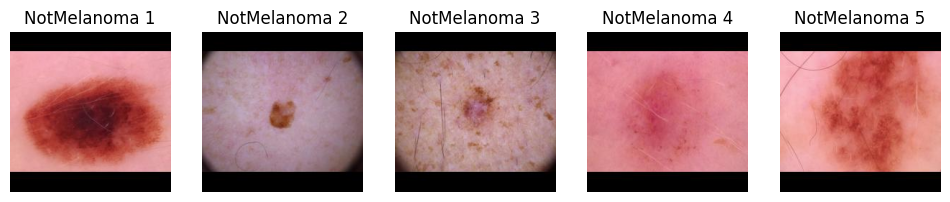

In [8]:
# Mostrar ejemplos de Melanoma y NotMelanoma
print("\nExample images - Melanoma")
show_images('Melanoma')

print("\nExample images - NotMelanoma")
show_images('NotMelanoma')

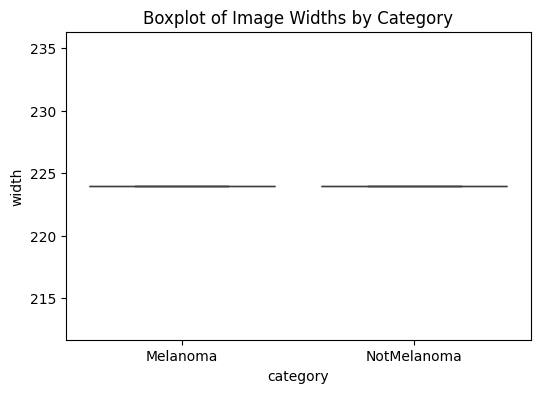

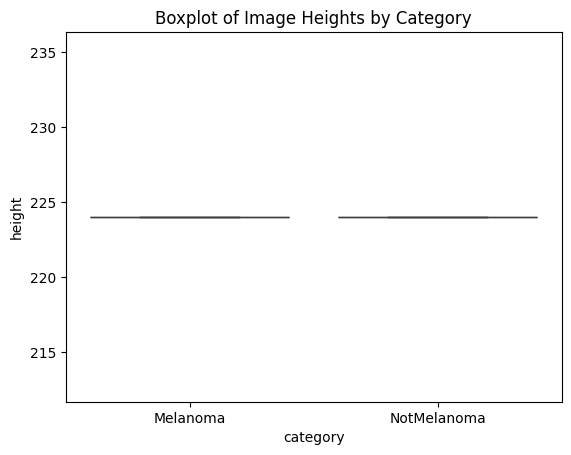

In [9]:
# Relación entre el tamaño de la imagen y las categorías
plt.figure(figsize=(6, 4))
sns.boxplot(x='category', y='width', data=image_data)
plt.title('Boxplot of Image Widths by Category')
plt.show()

sns.boxplot(x='category', y='height', data=image_data)
plt.title('Boxplot of Image Heights by Category')
plt.show()

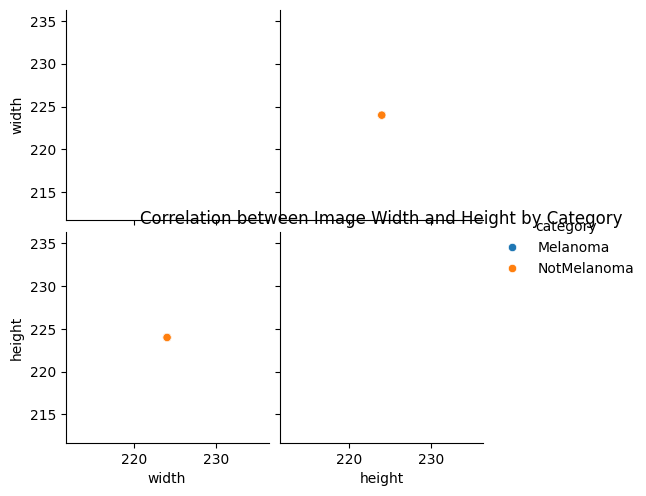

In [13]:
# Visualización de la correlación entre el ancho y la altura de las imágenes
sns.pairplot(image_data[['width', 'height', 'category']], hue='category')
plt.title('Correlation between Image Width and Height by Category')
plt.show()